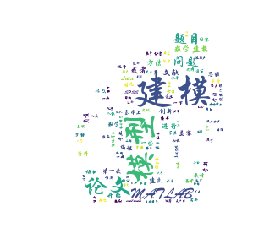

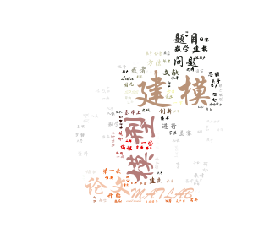

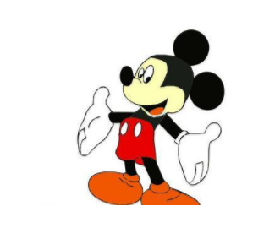

In [2]:
# -*- coding:utf-8 -*-  
import os
from scipy.misc import imread
import matplotlib.pyplot as plt
import jieba
# jieba.load_userdict("txt\userdict.txt")
# 添加用户词库为主词典,原词典变为非主词典
from wordcloud import WordCloud, ImageColorGenerator

# 获取当前文件路径
# __file__ 为当前文件, 在ide中运行此行会报错,可改为
# d = path.dirname('.')
path = os.path
d = path.abspath('.')

stopwords = {}
isCN = 1 #默认启用中文分词
back_coloring_path = "micky.png" # 设置背景图片路径
text_path = 'text2.txt' #设置要分析的文本路径
font_path = 'C:\Windows\Fonts\STXINGKA.TTF' # 为matplotlib设置中文字体路径没
stopwords_path = 'stopwords.txt' # 停用词词表
imgname1 = "WordCloudDefautColors.png" # 保存的图片名字1(只按照背景图片形状)
imgname2 = "WordCloudColorsByImg.png"# 保存的图片名字2(颜色按照背景图片颜色布局生成)

my_words_list = ['美赛'] # 在结巴的词库中添加新词

back_coloring = imread(path.join(d, back_coloring_path))# 设置背景图片

# 设置词云属性
wc = WordCloud(font_path=font_path,  # 设置字体
               background_color="white",  # 背景颜色
               max_words=2000,  # 词云显示的最大词数
               mask=back_coloring,  # 设置背景图片
               max_font_size=100,  # 字体最大值
               random_state=42,
               width=1000, height=860, margin=2,# 设置图片默认的大小,但是如果使用背景图片的话,那么保存的图片大小将会按照其大小保存,margin为词语边缘距离
               )

# 添加自己的词库分词
def add_word(list):
    for items in list:
        jieba.add_word(items)

add_word(my_words_list)

text = open(path.join(d, text_path)).read()

def jiebaclearText(text):
    mywordlist = []
    seg_list = jieba.cut(text, cut_all=False)
    liststr="/ ".join(seg_list)
    f_stop = open(stopwords_path)
    try:
        f_stop_text = f_stop.read()
        f_stop_text = f_stop_text.encode().decode('utf-8')
    finally:
        f_stop.close( )
    f_stop_seg_list=f_stop_text.split('\n')
    for myword in liststr.split('/'):
        if not(myword.strip() in f_stop_seg_list) and len(myword.strip())>1:
            mywordlist.append(myword)
    return ''.join(mywordlist)

if isCN:
    text = jiebaclearText(text)

# 生成词云, 可以用generate输入全部文本(wordcloud对中文分词支持不好,建议启用中文分词),也可以我们计算好词频后使用generate_from_frequencies函数
wc.generate(text)
# wc.generate_from_frequencies(txt_freq)
# txt_freq例子为[('词a', 100),('词b', 90),('词c', 80)]
# 从背景图片生成颜色值
image_colors = ImageColorGenerator(back_coloring)

plt.figure()
# 以下代码显示图片
plt.imshow(wc)
plt.axis("off")
plt.show()
# 绘制词云

# 保存图片
wc.to_file(path.join(d, imgname1))

image_colors = ImageColorGenerator(back_coloring)

plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
# 绘制背景图片为颜色的图片
plt.figure()
plt.imshow(back_coloring, cmap=plt.cm.gray)
plt.axis("off")
plt.show()
# 保存图片
wc.to_file(path.join(d, imgname2))
